<a href="https://colab.research.google.com/github/kiran2424/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Let's start...**

Netflix is one of the largest streaming service providers that offers a wide variety of award-winning TV shows, movies, anime, documentaries and more – on thousands of internet-connected devices. Their reach is across the globe from US to China, and Australia to India.

In this analysis, we will explore netflix dataset through visualizations and graphs using python libraries. Will apply different unsupervised clustering techniques to predict the output.

# **Importing Basic Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# **Importing Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix Movies and TV Shows Clustering - Kiran Mamtani/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
data.shape

(7787, 12)

Number od columns are 12 and rows are 7787

Lets see how our data look like

In [ ]:
data.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

So here we can see some of the features has unique values less than 15. Let's visualise it by performing EDA.

# **Exploratory Data Analysis**

Movie      5377
TV Show    2410
Name: type, dtype: int64


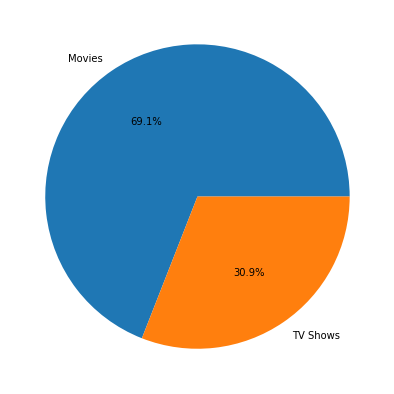

In [ ]:
type=data['type'].value_counts()
print(type)
fig = plt.figure(figsize=(10, 7))
plt.pie(type,labels=['Movies','TV Shows'],autopct='%1.1f%%')
plt.show()

The data has more number of movies compared to TV shows. 

69% - Movies

31% - TV Shows

In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We have 4 columns with null values


In date_added feature we have only 10 null value ao we can drop it.

In [4]:
data.dropna(subset=['date_added'],inplace=True)

In [ ]:
data.shape

(7777, 12)

Now the rows are 7777 from 7787

In [ ]:
rating=data['rating'].value_counts()
print(rating)

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


Rating feature has only 7 null values so will replace it with TV-MA (Which is highest in number)

In [5]:
data['rating'].fillna('TV-MA',inplace=True)

In [ ]:
data['rating'].shape

(7777,)

The other three columns who have null value will replace it as below

In [6]:
data['director'].fillna('No Director', inplace=True)
data['cast'].fillna('No Cast', inplace=True)
data['country'].fillna('Country Unavailable', inplace=True)

In [ ]:
data.shape

(7777, 12)

Lets check again for null value

In [ ]:
data.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

no null values....

Let's visualise the rating feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


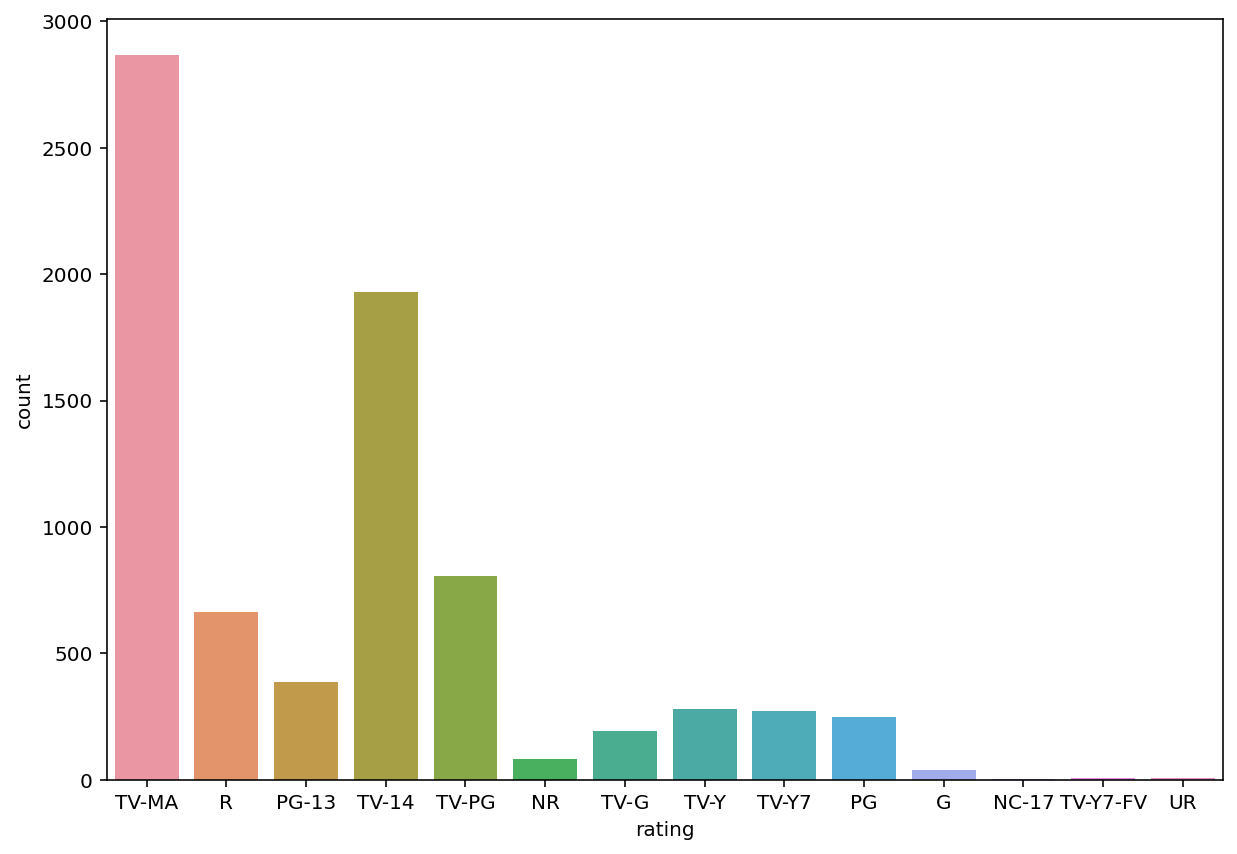

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.countplot(data['rating'])
plt.show()

Our data has TV-MA (TV Mature Audience Only) rating as a highest numbers followed by TV-14 (unsuitable for children under 14 years of age) , TV-PG (Parental Guidance) etc

Lets see rating of movies and TV shows differently

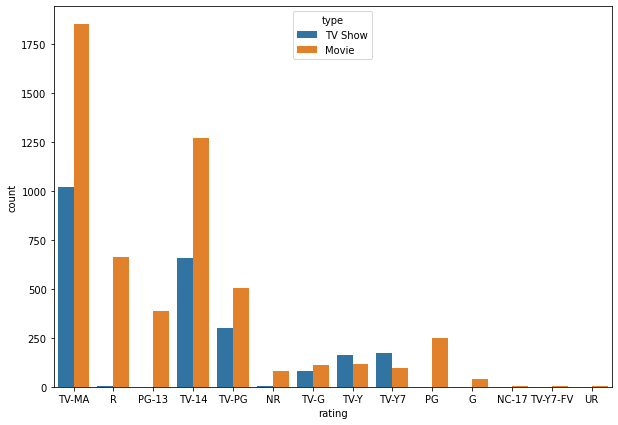

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='rating', hue = 'type', data=data)
plt.show()

In TV shows, the top three ratings are TV-MA, TV-14 and TV-PG (which is same as overall data)
In Movies, the top three ratings are TV-MA, TV-14 and R.

**Top and bottom 10 Countries on Netflix**

(121,)


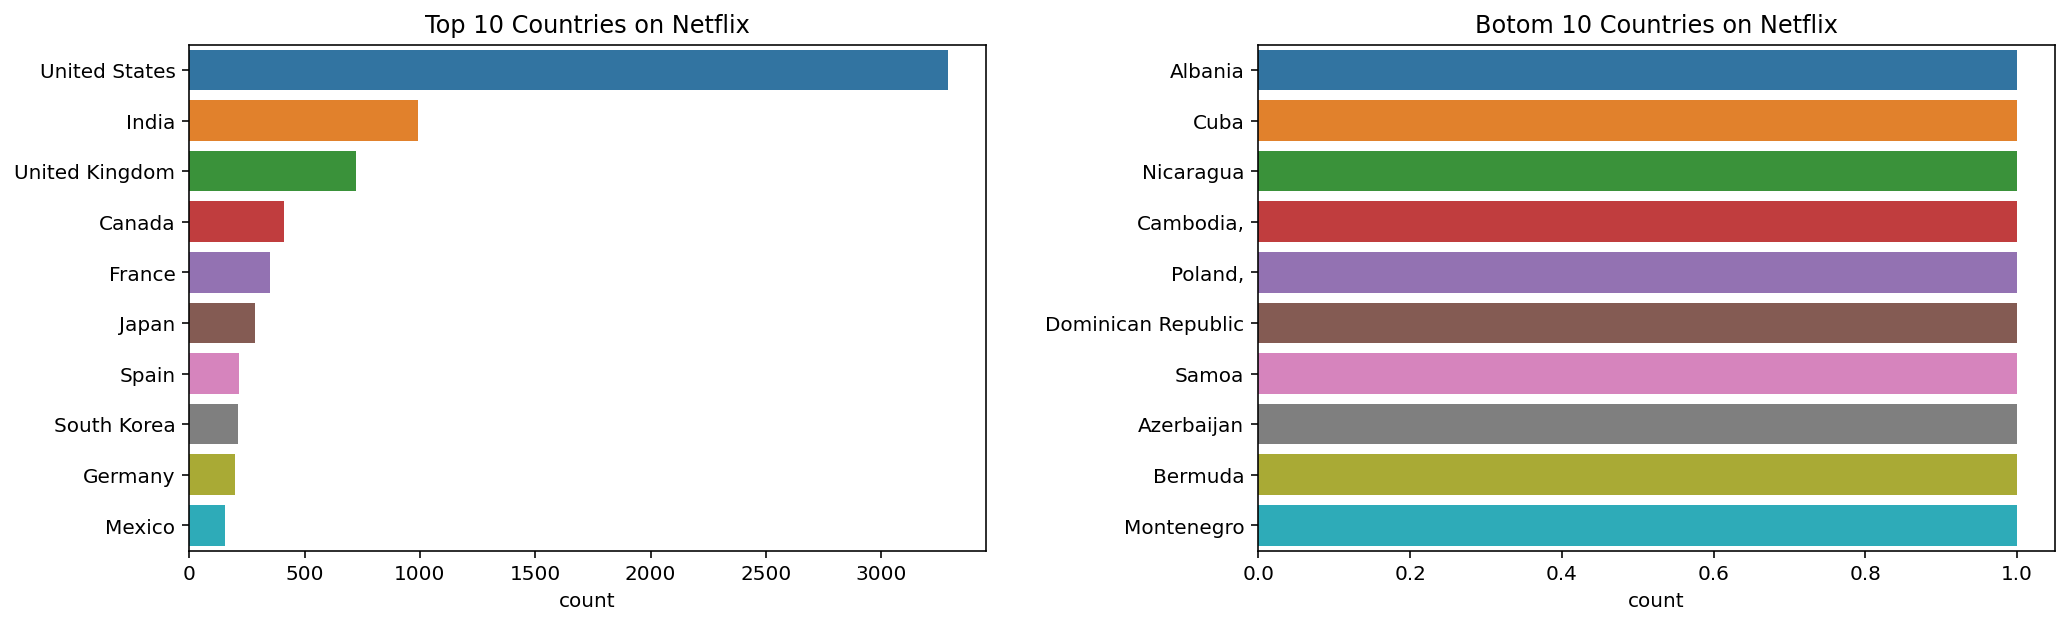

In [ ]:
filtered_countries = data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.rcParams['figure.figsize'] = (15, 5)
print(filtered_countries.value_counts().shape)
fig, axes = plt.subplots(1, 2)
sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10], ax=axes[0])
sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[111:], ax=axes[1])
axes[0].set_title('Top 10 Countries on Netflix')
axes[1].set_title('Botom 10 Countries on Netflix')
fig.tight_layout(pad=3.0)
plt.show()

The top three countries for content are US, India and UK whereas the bottom three are Azerbaijan, Bermuda and Montenegro.

**Top and bottom 10 Genre on Netflix**

(42,)


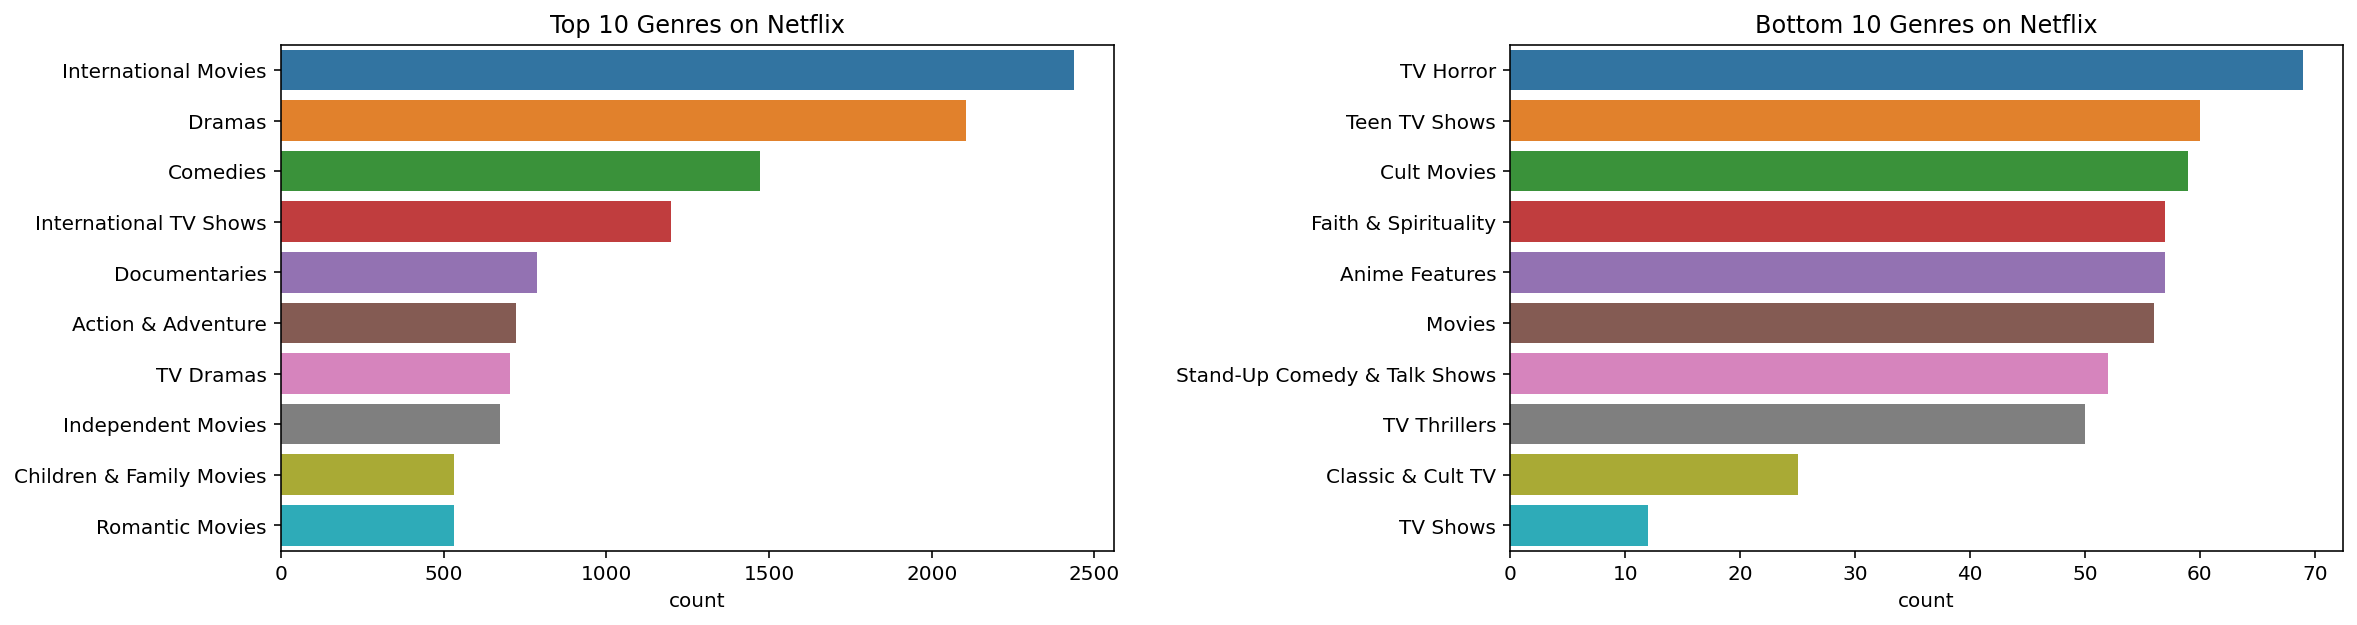

In [ ]:
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
print(filtered_genres.value_counts().shape)
plt.rcParams['figure.figsize'] = (17, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10], ax=axes[0])
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[32:], ax=axes[1])
axes[0].set_title('Top 10 Genres on Netflix')
axes[1].set_title('Bottom 10 Genres on Netflix')
fig.tight_layout(pad=3.0)
plt.show()

The top three genres for content are International Movies, Dramas and Comedies whereas the bottom three are TV Thrillers, Classics & Cult TV and TV shows

**Top and bottom 10 Directors on Netflix**

(4478,)


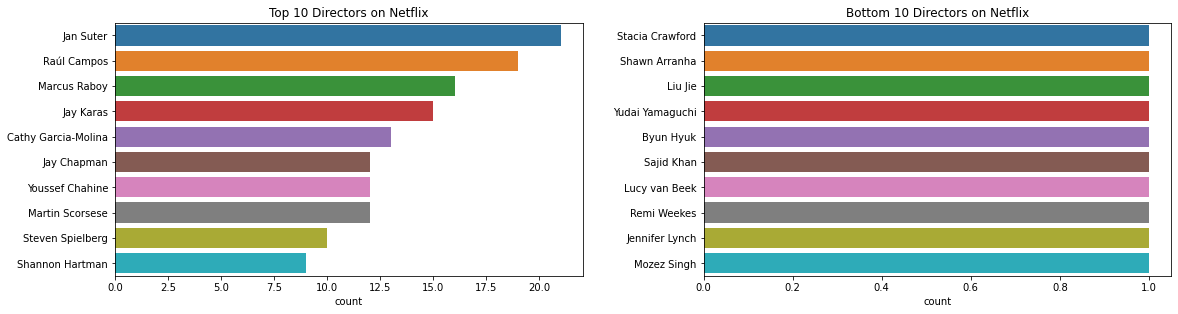

In [ ]:
filtered_directors = data[data.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
print(filtered_directors.value_counts().shape)
plt.rcParams['figure.figsize'] = (17, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], ax=axes[0])
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[4468:], ax=axes[1])
axes[0].set_title('Top 10 Directors on Netflix')
axes[1].set_title('Bottom 10 Directors on Netflix')
fig.tight_layout(pad=3.0)
plt.show()

The top three directors are Jan Suter, Raul Campos and Marcus Raboy whereas the bottom three are Remi Weekers, Jennifer Lynch and Mozez Singh

**Top and bottom 10 Casts on Netflix**

(32847,)


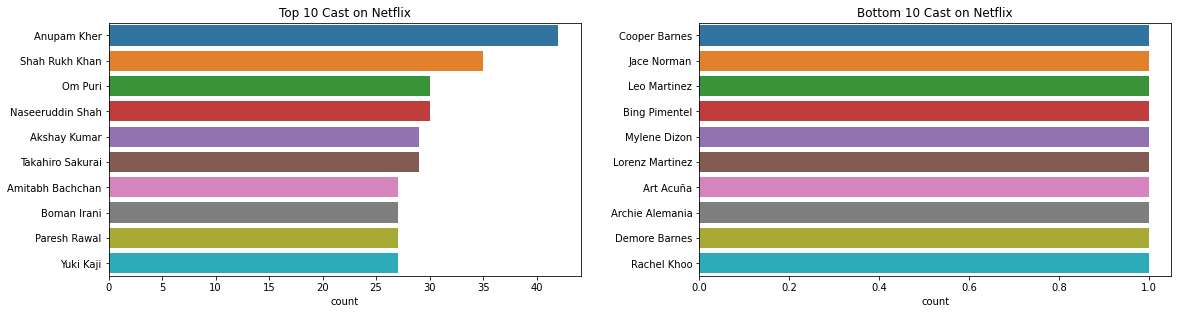

In [ ]:
filtered_cast = data[data.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
print(filtered_cast.value_counts().shape)
plt.rcParams['figure.figsize'] = (17, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], ax=axes[0])
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[32837:], ax=axes[1])
axes[0].set_title('Top 10 Cast on Netflix')
axes[1].set_title('Bottom 10 Cast on Netflix')
fig.tight_layout(pad=3.0)
plt.show()

The top three casts are Anupam Kher, Shah Rukh Khan and Om Puri whereas the bottom three are Archie Alemania, Demore Barnes and Rachel Khoo

# **Feature creation**

Now we have one featue called date_added which is in datetime format so we will create new features from it

In [7]:
data['added_day']=pd.DatetimeIndex(data['date_added']).day
data['added_month']=pd.DatetimeIndex(data['date_added']).month
data['added_year']=pd.DatetimeIndex(data['date_added']).year

In [ ]:
data.shape

(7777, 15)

Columns increases from 12 to 15

Lets visualise in which month the maximum movies and tv shows was added

12    833
10    785
1     757
11    738
3     669
9     619
8     618
4     601
7     600
5     543
6     542
2     472
Name: added_month, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


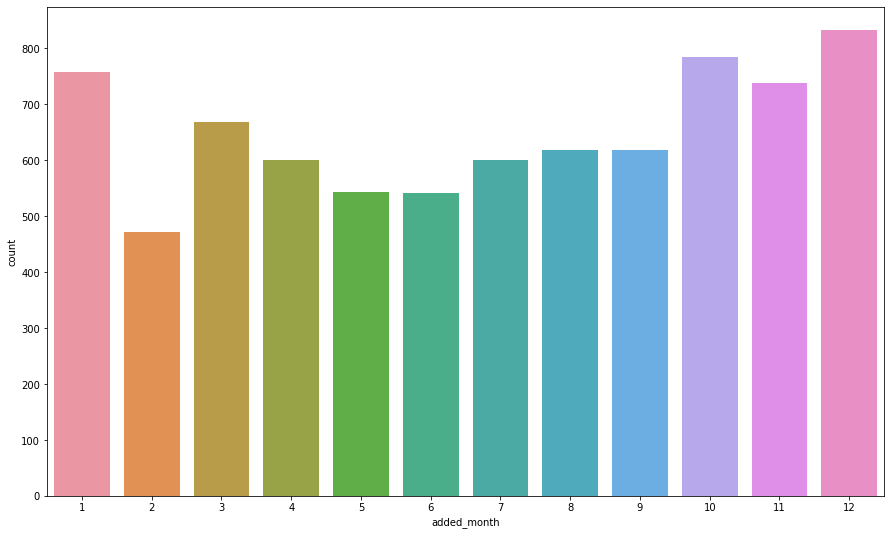

In [ ]:
added_month=data['added_month'].value_counts()
print(added_month)
fig = plt.figure(figsize=(15,9))
sns.countplot(data['added_month'])
plt.show()

So the highest video content was added in month of December followed by September and January. Here we can simply assume that these are those months where holidays are more that too in almost every countries...

Lets visualise the year of movies and TV shows added...

2019    2153
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: added_year, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


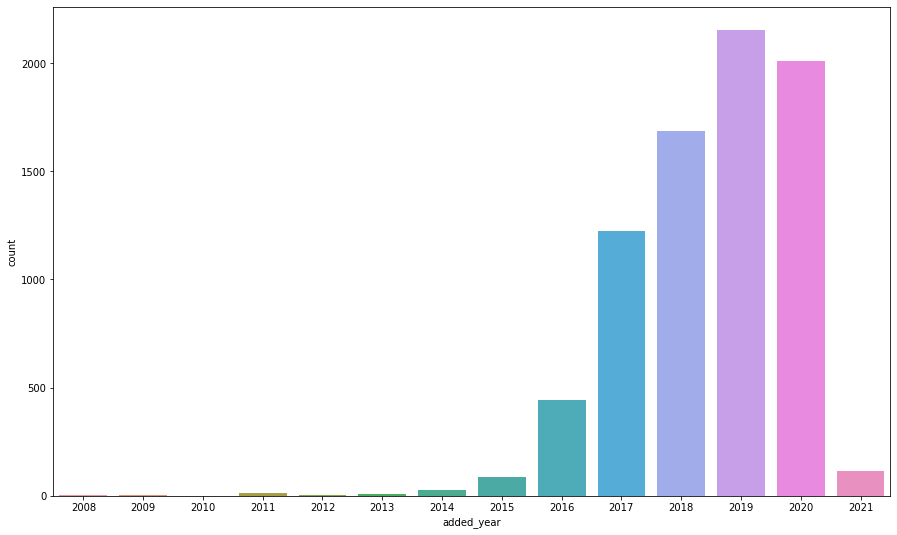

In [ ]:
added_year=data['added_year'].value_counts()
print(added_year)
fig = plt.figure(figsize=(15,9))
sns.countplot(data['added_year'])
plt.show()

In 2019, maximum video content was added followed by 2020 and 2018

Lets see differently for TV shows and movies. Since in our data we have very less numbers of year 2021 means not covered whole year 


In [ ]:
netflix_year = data[['type','added_year']]
movie_year = netflix_year[netflix_year['type']=='Movie'].added_year.value_counts().to_frame().reset_index()
movie_year = movie_year[movie_year != 2021]
show_year = netflix_year[netflix_year['type']=='TV Show'].added_year.value_counts().to_frame().reset_index()
show_year = show_year[show_year != 2021]

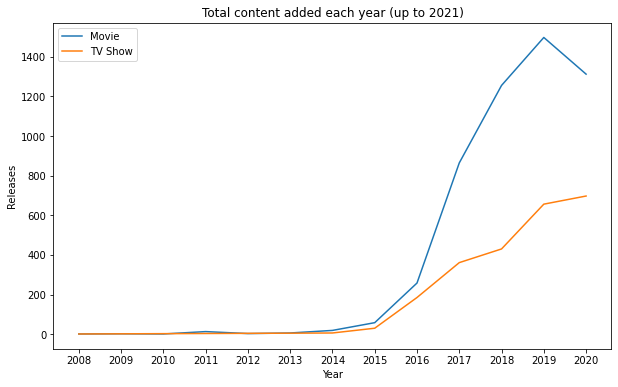

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movie_year, x='index',y='added_year')
sns.lineplot(data=show_year, x='index',y='added_year')

ax.set_xticks(np.arange(2008, 2021, 1))
plt.title("Total content added each year (up to 2021)")
plt.legend(['Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. We decided to exclude content added during 2021 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows.

Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. 

In [ ]:
netflix_content = data[['type','duration']]
netflix_movies = netflix_content[netflix_content['type']=='Movie'].duration.str.replace(' min','').astype(int)
netflix_tvshows = netflix_content[netflix_content['type']=='TV Show'].rename(columns={'duration':'seasons'}).replace({'seasons':{'1 Season':'1 Seasons'}}).seasons.str.replace(' Seasons','').astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


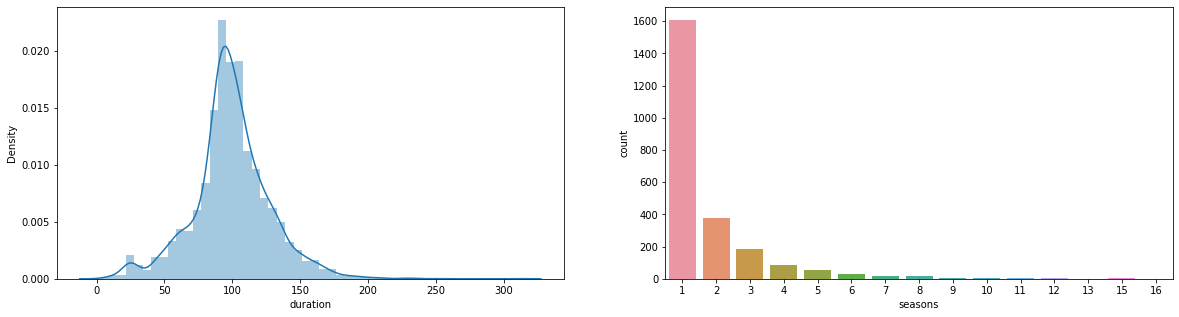

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
sns.distplot(netflix_movies,ax=axes[0])
sns.countplot(netflix_tvshows,ax=axes[1])
plt.show()

Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

# **One Hot Endocing**

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [9]:
data.listed_in = data.listed_in.str.split(', ').tolist()
mlb = MultiLabelBinarizer()
mlb_data = data.join(pd.DataFrame(mlb.fit_transform(data['listed_in']),columns=mlb.classes_ ,index=data.index))

In [10]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
one_hot_rating = pd.DataFrame(one_hot_encoder.fit_transform(mlb_data[['rating']]),columns=data['rating'].unique())
one_hot_rating.index = mlb_data.index
mlb_data = mlb_data.join(one_hot_rating)

In [11]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 4.0 MB/s 


In [12]:
netflix_encoded_data = mlb_data.drop(['listed_in','show_id','date_added','release_year','duration','added_day',	'added_month','added_year','type','title','director','cast','country','rating','description'], axis=1)
netflix_encoded_data.head()


,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV-PG,NR,TV-G,TV-Y,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now our data dont have any text data

# **Scaling the data**

In [13]:
from sklearn.preprocessing import StandardScaler, normalize

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(netflix_encoded_data)

In [31]:
X_scaled

array([[-0.31966004, -0.08592683, -0.13880222, ..., -0.18964818,
        -0.02778671, -0.02536405],
       [-0.31966004, -0.08592683, -0.13880222, ..., -0.18964818,
        -0.02778671, -0.02536405],
       [-0.31966004, -0.08592683, -0.13880222, ..., -0.18964818,
        -0.02778671, -0.02536405],
       ...,
       [-0.31966004, -0.08592683, -0.13880222, ..., -0.18964818,
        -0.02778671, -0.02536405],
       [-0.31966004, -0.08592683, -0.13880222, ..., -0.18964818,
        -0.02778671, -0.02536405],
       [-0.31966004, -0.08592683, -0.13880222, ..., -0.18964818,
        -0.02778671, -0.02536405]])

# **Using Principal Component Analysis for dimensionality reduction**

In [16]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
data_transformed = pca.transform(X_scaled)

In [34]:
data_transformed

array([[ 3.46831481, -1.09683155],
       [-0.97949758, -1.17185344],
       [-1.48693283, -0.59303418],
       ...,
       [-0.76614963, -0.53618027],
       [ 1.79424879,  0.39653702],
       [-0.12917688, -0.02493749]])

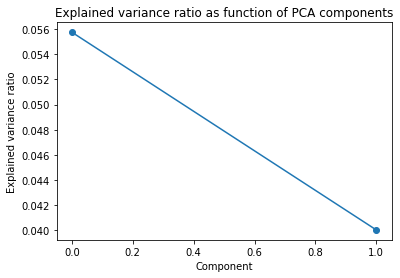

In [35]:
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

Transformed into 2D

In [ ]:
data_transformed.shape

(7777, 2)

# **Clustering Techniques**

# **K-Means Clustering**

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=20)
kmeans.fit(data_transformed)
y_kmeans = kmeans.predict(data_transformed)

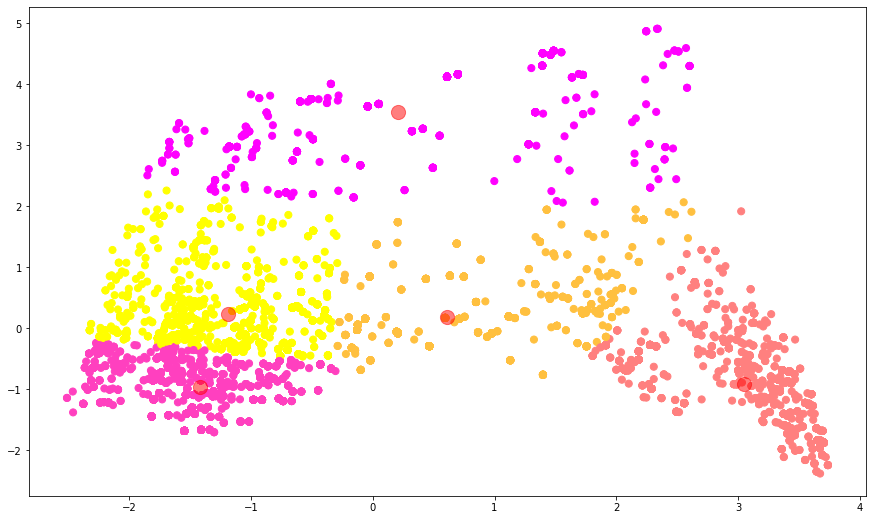

In [37]:
fig = plt.figure(figsize=(15,9))

plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=y_kmeans, s=50, cmap='spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Very clumsy cluster lets find the correct value of k and for that we will use two methods 1) Elbow method and 2 ) Silhouette Score method

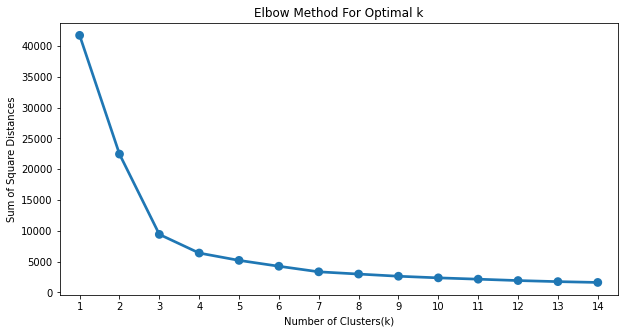

In [38]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k)
    km = km.fit(data_transformed)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(10,5))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Here the optimal k value is 3 since from 3 it's decreasing

Applying Silhouette Score Method

For n_clusters = 2 The average silhouette_score is : 0.5277457131484253
For n_clusters = 3 The average silhouette_score is : 0.6221758037723033
For n_clusters = 4 The average silhouette_score is : 0.5237037082343706
For n_clusters = 5 The average silhouette_score is : 0.45456887339391305
For n_clusters = 6 The average silhouette_score is : 0.4783925422445549
For n_clusters = 7 The average silhouette_score is : 0.43994541255179137
For n_clusters = 8 The average silhouette_score is : 0.4336825402939198
For n_clusters = 9 The average silhouette_score is : 0.405006528461911
For n_clusters = 10 The average silhouette_score is : 0.41273406699662984
For n_clusters = 11 The average silhouette_score is : 0.41882160144586594
For n_clusters = 12 The average silhouette_score is : 0.41905257673466634
For n_clusters = 13 The average silhouette_score is : 0.4179129473909935
For n_clusters = 14 The average silhouette_score is : 0.4182709257997127
For n_clusters = 15 The average silhouette_score is : 0

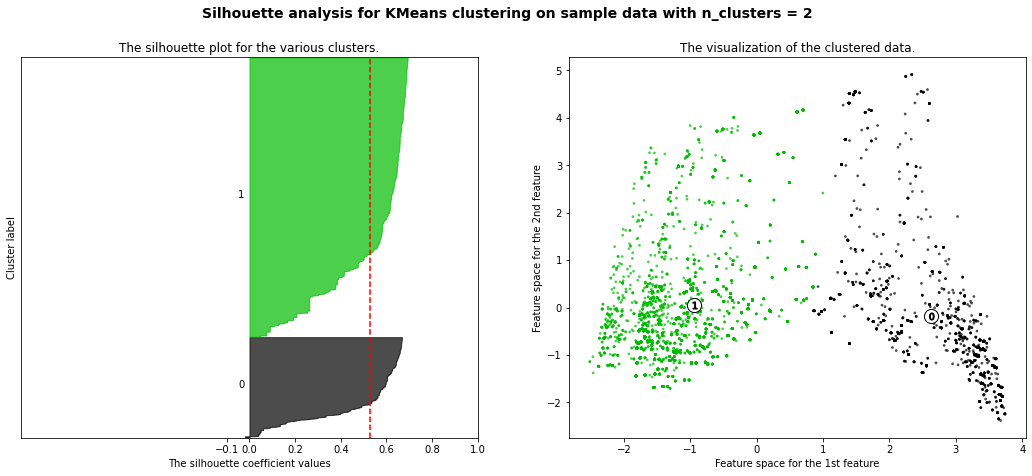

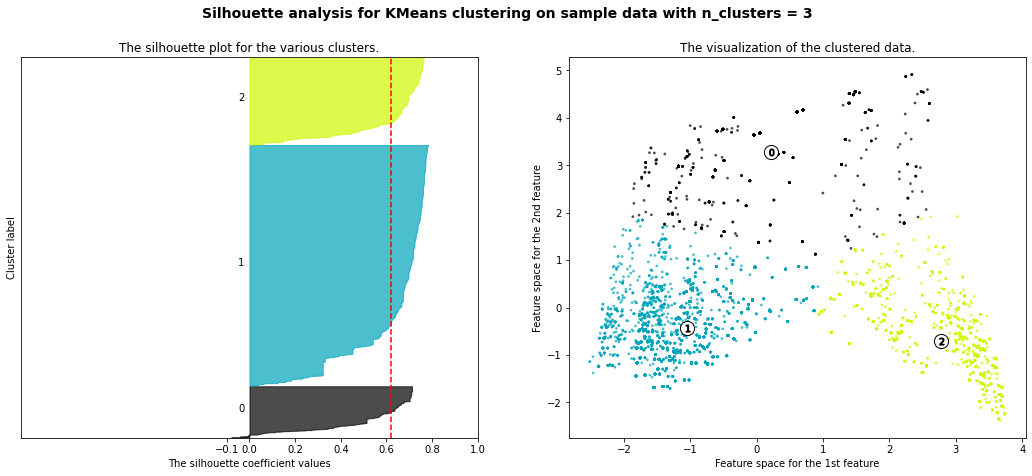

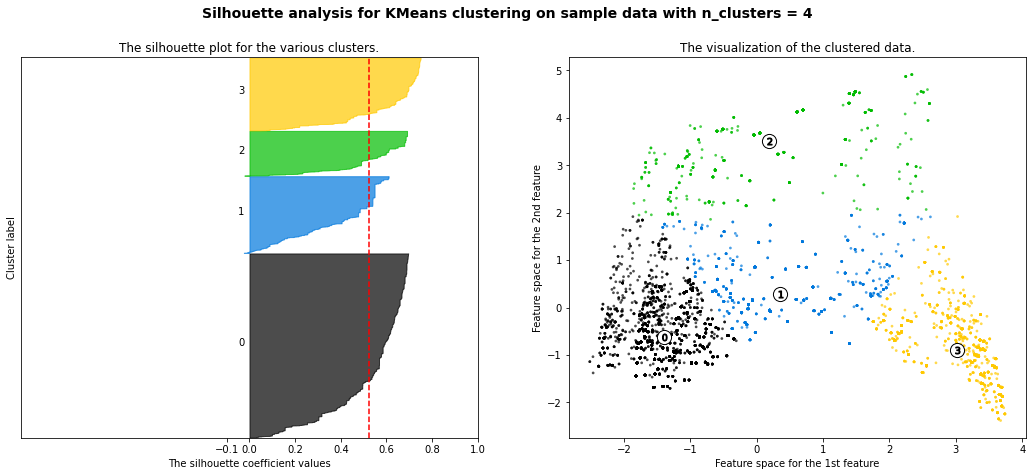

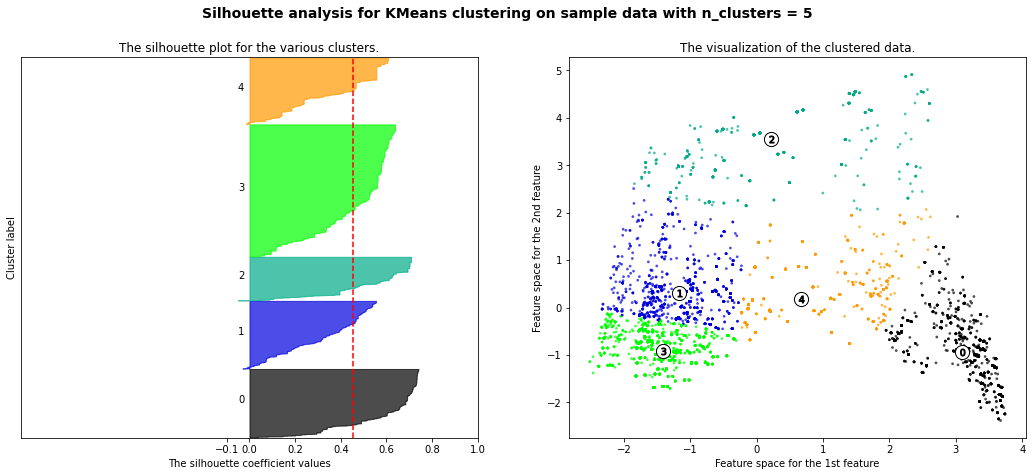

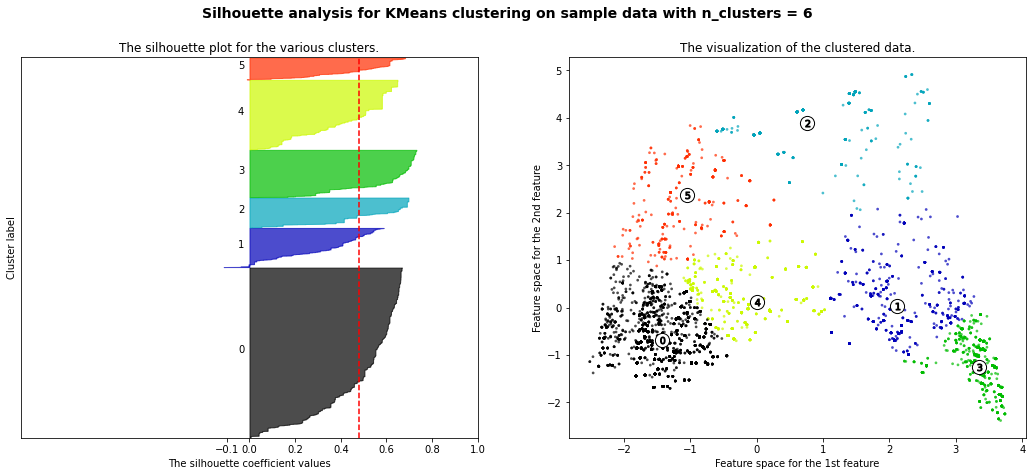

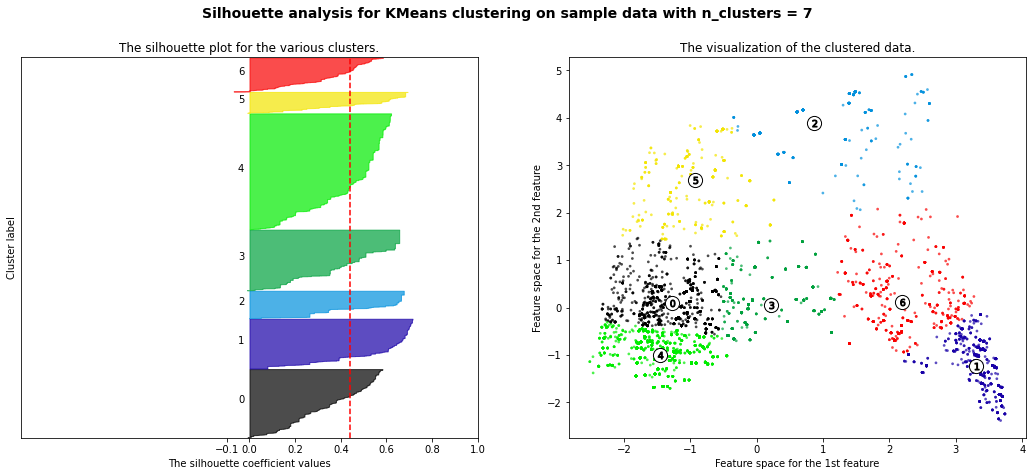

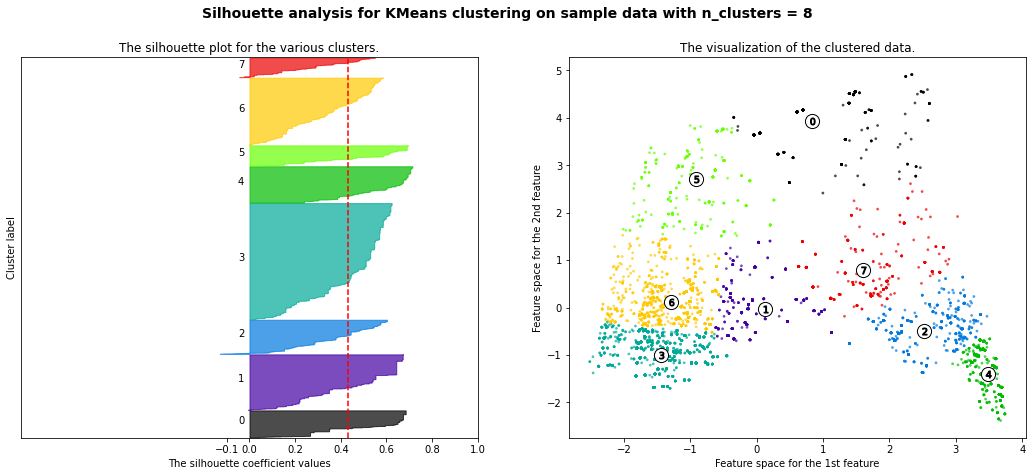

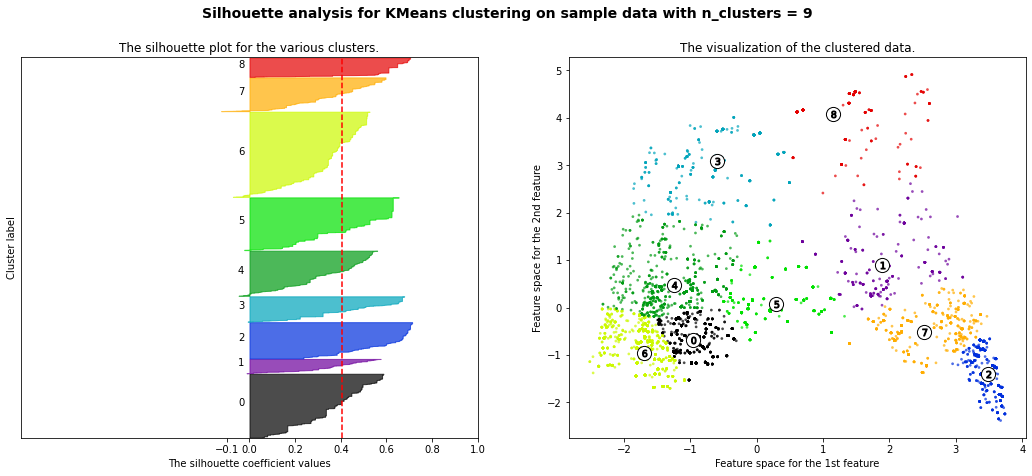

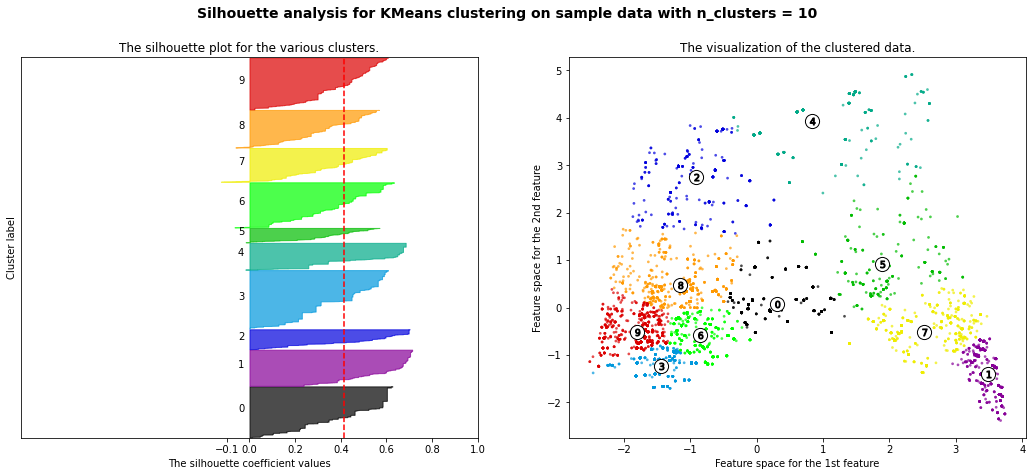

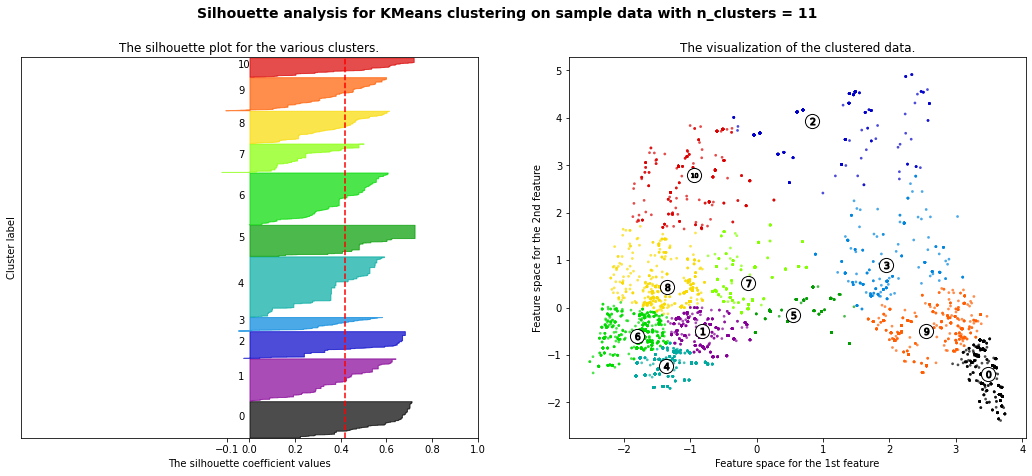

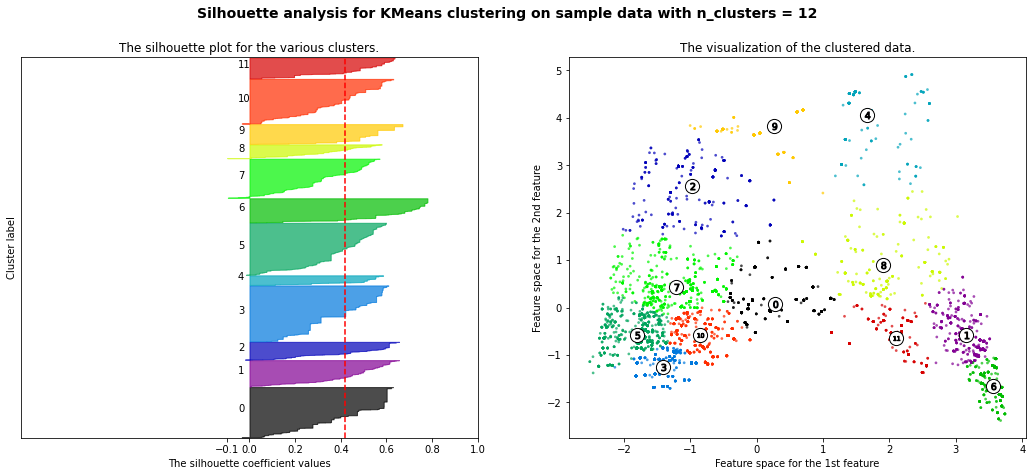

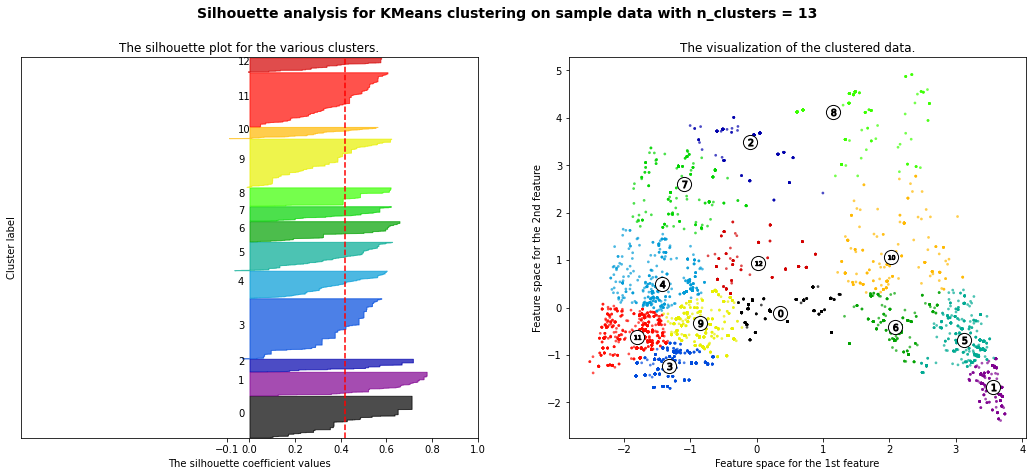

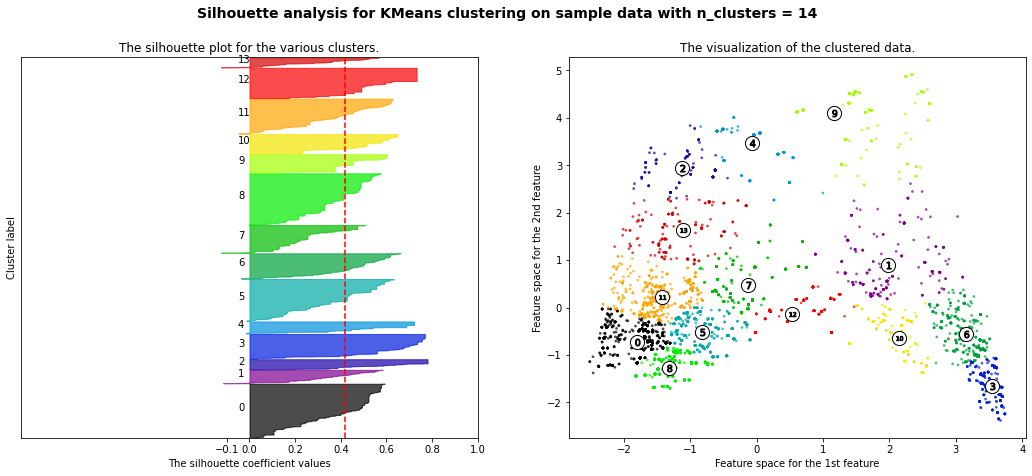

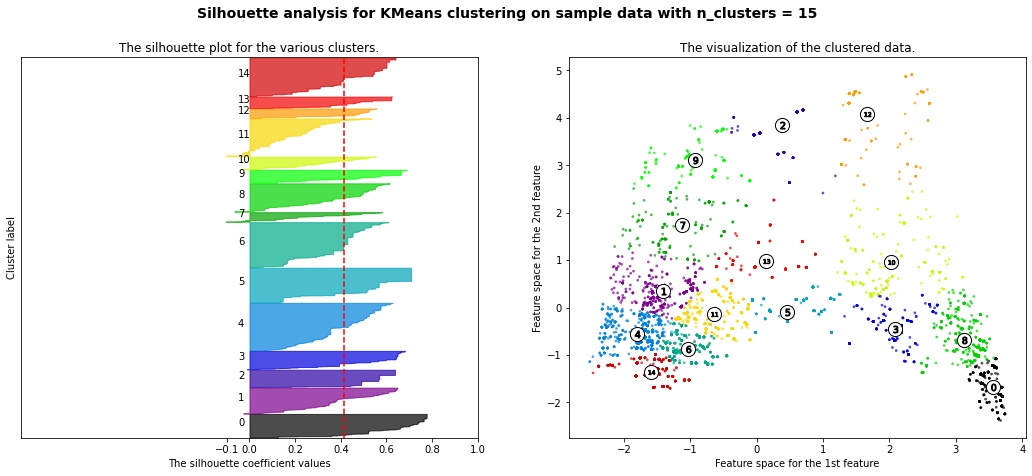

In [39]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_transformed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_transformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(data_transformed[:, 0], data_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The highest Silhouette score is of cluster 3 as there is least outliers. Lets visualise it.

In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_transformed)
y_kmeans= kmeans.predict(data_transformed)

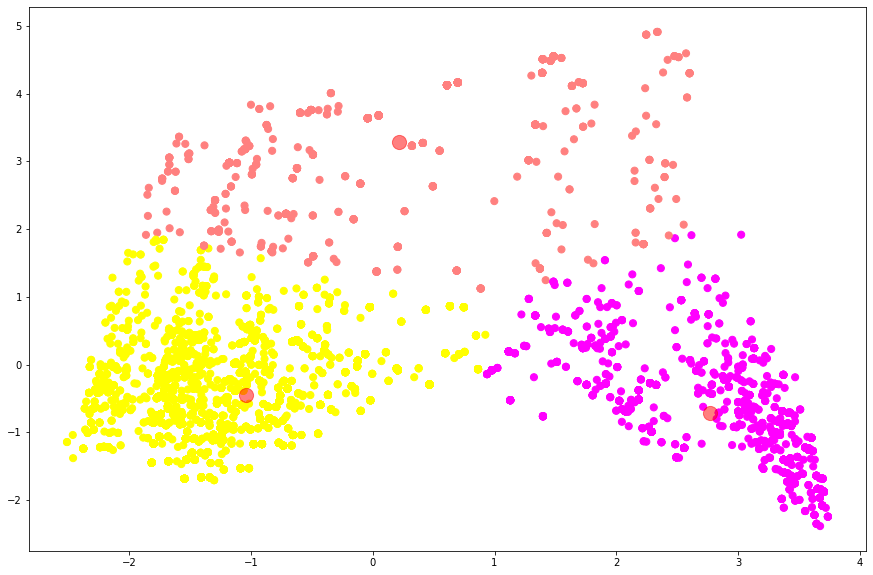

In [41]:
plt.figure(figsize=(15,10))
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# **DBSCAN - Density-based spatial clustering of applications with noise**

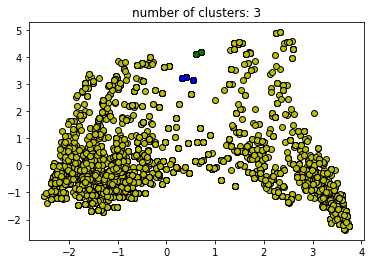

In [55]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.5, min_samples=10).fit(data_transformed)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = data_transformed[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = data_transformed[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

Two clusters are formed and noise is highlighted in black

# **Agglomerative Clustering**

In [43]:
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

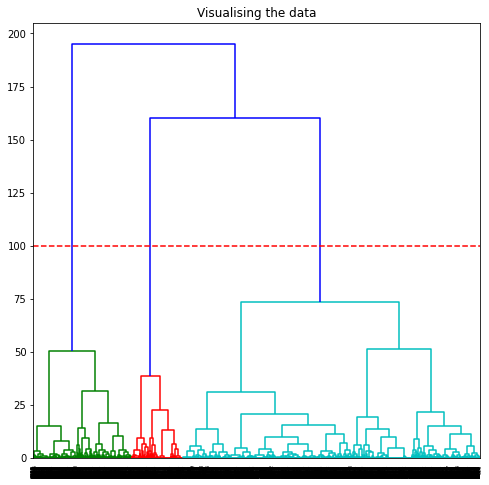

In [46]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data_transformed, method ='ward')))
plt.axhline(y=100, color='r', linestyle='--')

Building and Visualizing the different clustering models for different values of k

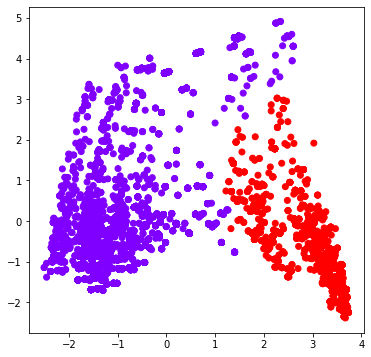

In [47]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_transformed[:,0], data_transformed[:,1], c = ac2.fit_predict(data_transformed), cmap ='rainbow')
plt.show()

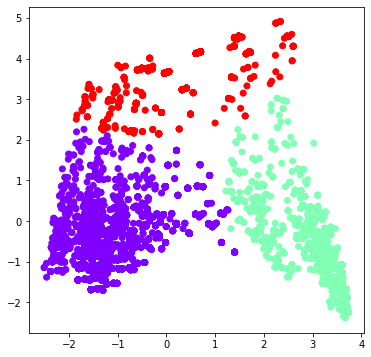

In [48]:
ac3 = AgglomerativeClustering(n_clusters = 3)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_transformed[:,0], data_transformed[:,1], c = ac3.fit_predict(data_transformed), cmap ='rainbow')
plt.show()

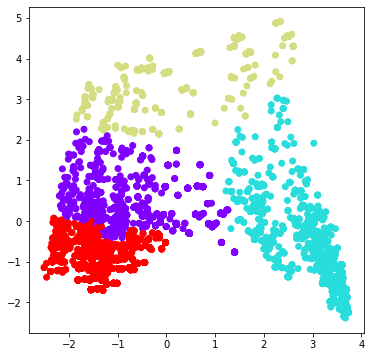

In [49]:
ac4 = AgglomerativeClustering(n_clusters = 4)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_transformed[:,0], data_transformed[:,1], c = ac4.fit_predict(data_transformed), cmap ='rainbow')
plt.show()

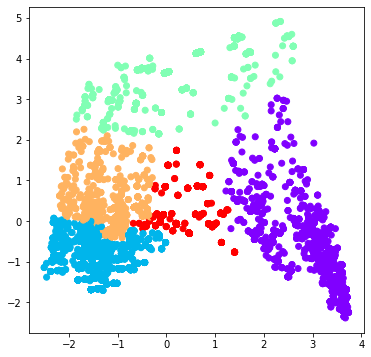

In [50]:
ac5 = AgglomerativeClustering(n_clusters = 5)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_transformed[:,0], data_transformed[:,1], c = ac5.fit_predict(data_transformed), cmap ='rainbow')
plt.show()

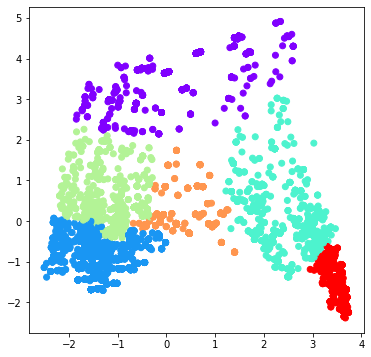

In [51]:
ac6 = AgglomerativeClustering(n_clusters = 6)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_transformed[:,0], data_transformed[:,1], c = ac6.fit_predict(data_transformed), cmap ='rainbow')
plt.show()

To determine the optimal number of clusters We will use the Silhouette Scores for the purpose.

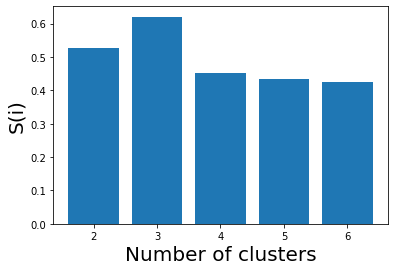

In [52]:
k = [2, 3, 4, 5, 6]
silhouette_scores = []
silhouette_scores.append(silhouette_score(data_transformed, ac2.fit_predict(data_transformed)))
silhouette_scores.append(silhouette_score(data_transformed, ac3.fit_predict(data_transformed)))
silhouette_scores.append(silhouette_score(data_transformed, ac4.fit_predict(data_transformed)))
silhouette_scores.append(silhouette_score(data_transformed, ac5.fit_predict(data_transformed)))
silhouette_scores.append(silhouette_score(data_transformed, ac6.fit_predict(data_transformed)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

The highest Silhouette Scores is of 3 clusters

# **Natural Language Processing (NLP)**

In [ ]:
data_nlp=data.copy()

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
%config InlineBackend.figure_format = 'retina'

Apply the function to each examples

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
data_nlp['description'] = data_nlp['description'].apply(remove_punctuation)

Removing stopwords

In [ ]:
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
data_nlp['description'] = data_nlp['description'].apply(stopwords)

In [ ]:
!pip install matplotlib-venn
!pip install nltk
import nltk 
from nltk import ne_chunk
!python3 -c

!python -m spacy download en_core_web_lg
import en_core_web_lg
nlp = en_core_web_lg.load()
!nlp = spacy.load('en_core_web_lg')


Argument expected for the -c option
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=c1aad62bf20e2952e542a2375751378ad87a996cc399469ca22dbb7e43fe4160
  Stored in directory: /tmp/pip-ephem-wheel-cache-crjs90gl/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `nlp = spacy.load('en_core_web_lg')'


In [ ]:
# word vectors for all movie and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in data_nlp.iterrows()])

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [ ]:
vec_mean = vectors.mean(axis=0)
centered = vectors - vec_mean


In [ ]:
def get_similar_description_indices(description_vec):
    
    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])
    
    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-6:-1]
    
    return most_similar_index

In [ ]:
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])


In [ ]:
test_index = data_nlp.index[data_nlp.title == "3 Idiots"][0]

print("Chosen Movie/TV Show")
print(data_nlp.title[test_index] + ': ' + '\n' + data.description[test_index] +'\n'+'Genre: '+ data.listed_in[test_index]+ '\n')
print("Top Recommendations")
print(data_nlp.title[similar_indices[test_index][3]] + ': ' + '\n' + data.description[similar_indices[test_index][3]] +'\n'+'Genre: '+ data.listed_in[similar_indices[test_index][3]]+ '\n')
print(data_nlp.title[similar_indices[test_index][2]] + ': ' + '\n' + data.description[similar_indices[test_index][2]] +'\n'+'Genre: '+ data.listed_in[similar_indices[test_index][2]]+ '\n')
print(data_nlp.title[similar_indices[test_index][1]] + ': ' + '\n' + data.description[similar_indices[test_index][1]] +'\n'+'Genre: '+ data.listed_in[similar_indices[test_index][1]]+ '\n')
print(data_nlp.title[similar_indices[test_index][0]] + ': ' + '\n' + data.description[similar_indices[test_index][0]] +'\n'+'Genre: '+ data.listed_in[similar_indices[test_index][0]])

Chosen Movie/TV Show
3 Idiots: 
While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system.
Genre: Comedies, Dramas, International Movies

Top Recommendations
Rebelde: 
Six students at an exclusive prep school, some on scholarship, discover that music can close the class divide.
Genre: International TV Shows, Romantic TV Shows, Spanish-Language TV Shows

100 Things to do Before High School: 
Led by seventh-grader C.J., three students who have been warned about the dangers of high school decide to make the best of their middle-school years.
Genre: Movies

Mr. Young: 
After Adam graduates from college at age 14, he heads back to high school to teach science, where his crush and his best friends are his students!
Genre: Kids' TV, TV Comedies

Moms at War: 
Two fierce mothers become rivals when a school contest forces their kids, both model students, to compete against one another to be the best in c

Getting similar recommendation of titles based on description and getting somewhat common or related genre between all the above results.

Lets apply topic modelling approach to identify topics that best describes a set of documents

# **Topic Modeling**

# **Latent semantic analysis**

In [ ]:
data_lsa=data.copy()

In [ ]:
import nltk 
from nltk import ne_chunk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,sent_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_lsa['listed_in'] = data_lsa['listed_in'].apply(remove_punctuation)
data_lsa['description'] = data_lsa['description'].apply(remove_punctuation)
data_lsa['listed_in'] = data_lsa['listed_in'].apply(stopwords)
data_lsa['description'] = data_lsa['description'].apply(stopwords)

In [ ]:
text_data = data_lsa['listed_in'] + data_lsa['description']

In [ ]:
text_data

0       international tv shows tv dramas tv scifi fant...
1       dramas international moviesdevastating earthqu...
2       horror movies international moviesarmy recruit...
3       action adventure independent movies scifi fant...
4       dramasbrilliant group students become cardcoun...
                              ...                        
7782    dramas international movieslebanons civil war ...
7783    dramas international movies music musicalsscra...
7784    documentaries international movies music music...
7785    international tv shows reality tvdessert wizar...
7786    documentaries music musicalsdocumentary delves...
Length: 7777, dtype: object

In [ ]:
vect =TfidfVectorizer(stop_words='english',max_features=1000)
vect_text=vect.fit_transform(text_data)
print(vect.get_feature_names())

['1970s', '1980s', 'abuse', 'academy', 'accident', 'accidentally', 'accused', 'act', 'action', 'activist', 'actor', 'actress', 'adventure', 'adventures', 'affair', 'africa', 'african', 'age', 'agency', 'agent', 'agents', 'ago', 'agrees', 'alien', 'aliens', 'ambitious', 'america', 'american', 'amid', 'ancient', 'angeles', 'animal', 'animals', 'animated', 'anime', 'answers', 'anthology', 'apart', 'apartment', 'army', 'arrives', 'art', 'artist', 'artists', 'arts', 'aspiring', 'athletes', 'attack', 'attempt', 'attempts', 'attention', 'attorney', 'away', 'awkward', 'baby', 'bachelor', 'bad', 'band', 'bank', 'based', 'battle', 'battles', 'beautiful', 'beauty', 'befriends', 'begin', 'begins', 'beloved', 'best', 'better', 'big', 'biggest', 'birth', 'birthday', 'black', 'body', 'bond', 'bonds', 'book', 'boss', 'boy', 'boyfriend', 'boys', 'brave', 'break', 'breaks', 'bring', 'brings', 'british', 'brother', 'brothers', 'brutal', 'buddies', 'build', 'building', 'business', 'businessman', 'called',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top[0])
print(lsa_top.shape)

[ 0.45992442 -0.05546412  0.0318496  -0.04619801 -0.00890177 -0.02455829
 -0.03095422  0.03894751 -0.00281734 -0.06112058]
(7777, 10)


In [ ]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Genre "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Genre 0: 
tv shows international crime romantic dramas british series comedies movies 

 NETFLIX Genre 1: 
movies dramas international comedies independent family children adventure action young 

 NETFLIX Genre 2: 
action adventure scifi kids anime features save mission children world 

 NETFLIX Genre 3: 
standup family children special comedy kids comedian comic talk friends 

 NETFLIX Genre 4: 
family children movies save kids friends tv christmas horror help 

 NETFLIX Genre 5: 
documentaries music documentary sports world series docuseries international nature reality 

 NETFLIX Genre 6: 
comedies kids friends romantic series new school anime best life 

 NETFLIX Genre 7: 
independent kids series dramas horror docuseries anime new science nature 

 NETFLIX Genre 8: 
horror movies romantic music scifi kids classic cult friends tv 

 NETFLIX Genre 9: 
docuseries reality nature science series romantic british international anime world 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Latent Dirichlet Allocation**

In [ ]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


Punctuation was removed from dicription in above code now will have to remove from all other columns

In [ ]:
data_lda=data.copy()

In [ ]:
data_lda.drop(labels=['date_added', 'release_year','rating','duration','show_id','added_day','added_month','added_year'], axis=1,inplace=True)

In [ ]:
data_lda['director'] = data_lda['director'].apply(remove_punctuation)
data_lda['cast'] = data_lda['cast'].apply(remove_punctuation)
data_lda['country'] = data_lda['country'].apply(remove_punctuation)
data_lda['title'] = data_lda['title'].apply(remove_punctuation)
data_lda['title']=data_lda.title.astype(str)

In [ ]:
data_lda= (data_lda.set_index([	'title','type',	'director',	'cast',	'country'	,	'description'])
   .stack()
   .str.split(',', expand=True)
   .stack()
   .reset_index(-1, drop=True)
   .reset_index()
)
data_lda.drop(labels=['level_6'], axis=1,inplace=True)
data_lda.rename(columns = {0:'listed_in'}, inplace = True)
data_lda.head(2)

,title,type,director,cast,country,description,listed_in
0,3,TV Show,No Director,João Miguel Bianca Comparato Michel Gomes Rodo...,Brazil,In a future where the elite inhabit an island ...,International TV Shows
1,3,TV Show,No Director,João Miguel Bianca Comparato Michel Gomes Rodo...,Brazil,In a future where the elite inhabit an island ...,TV Dramas


In [ ]:
data_lda.listed_in = data_lda.listed_in.str.replace(' ', '')

In [ ]:
data_lda.head(2)

,title,type,director,cast,country,description,listed_in
0,3,TV Show,No Director,João Miguel Bianca Comparato Michel Gomes Rodo...,Brazil,In a future where the elite inhabit an island ...,InternationalTVShows
1,3,TV Show,No Director,João Miguel Bianca Comparato Michel Gomes Rodo...,Brazil,In a future where the elite inhabit an island ...,TVDramas


In [ ]:
data_new=data_lda['listed_in']

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

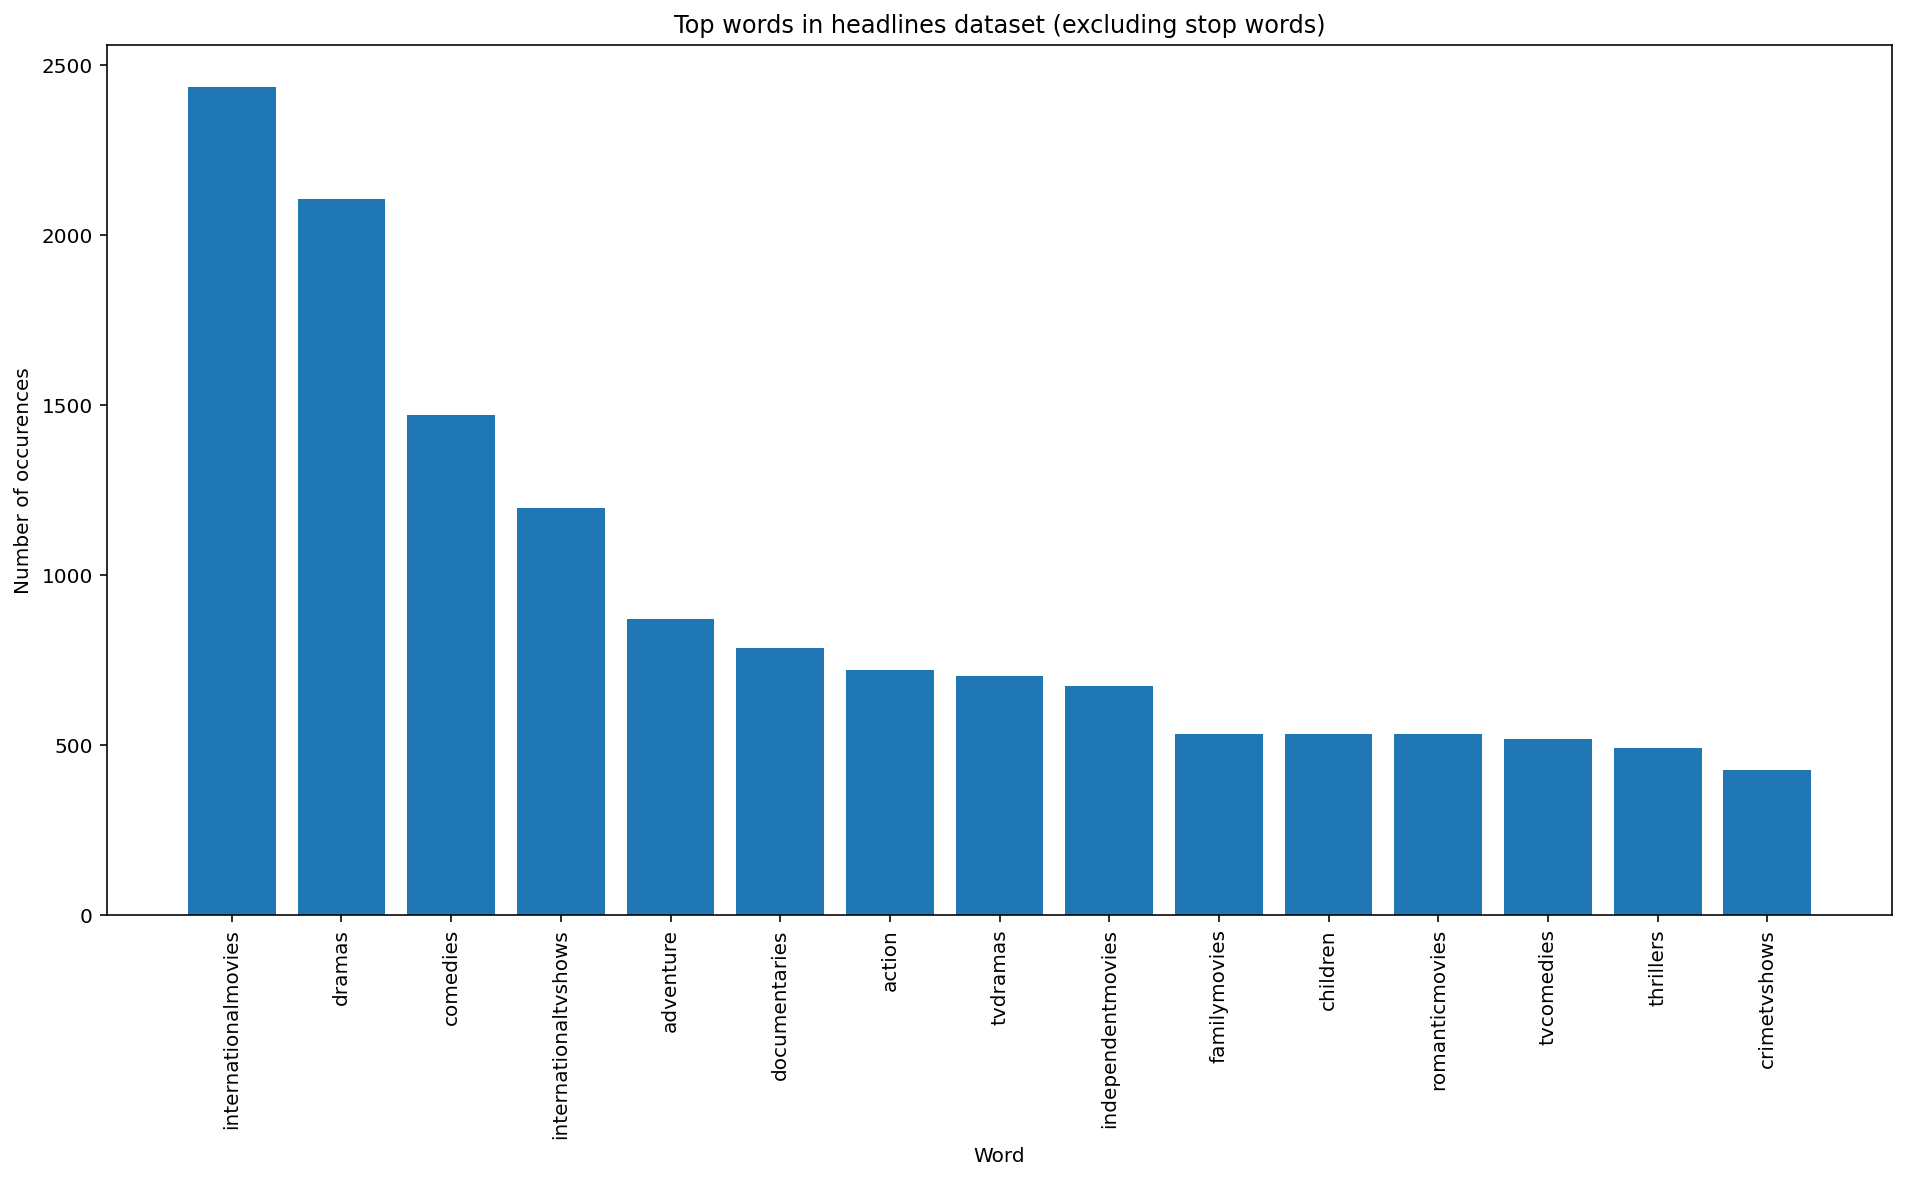

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_new)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [ ]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
small_text_sample = data_new.sample(n=14000, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[170]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[170]))

Headline before vectorization: InternationalTVShows
Headline after vectorization: 
  (0, 22)	1


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(small_document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(small_document_term_matrix))

Best LDA model's params {'n_components': 8}
Best log likelihood Score for the LDA model -11444.924360481114
LDA model Perplexity on train data 27.703903637443574


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 33.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2a2ff01b1c8f517d76ad90d5c03fde236b9b34801430f7bef255dd6d4db7165c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, small_document_term_matrix,small_count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7     -108.958252 -208.941483       1        1  19.775860
6      186.487061  -98.103249       2        1  14.583665
3       19.245832  160.858780       3        1  13.075507
1      170.658829   75.445076       4        1  12.059317
5       -1.386411  -35.043739       5        1  11.289898
4     -145.800095  106.944611       6        1  10.606280
0       64.834541 -221.825272       7        1  10.544043
2     -196.906036  -58.990913       8        1   8.065430, topic_info=                    Term       Freq        Total Category  logprob  loglift
8               comedies  1237.0000  1237.000000  Default   30.000  30.0000
21   internationalmovies  1485.0000  1485.000000  Default   29.000  29.0000
14                dramas  1313.0000  1313.000000  Default   28.000  28.0000
22  internationaltvshows   925.0000   925.000000  Default   27.000  27.0000
9           crimetvshows   621.0000   621.000000  Default   26.000  26.0000
..                   ...        ...          ...      ...      ...      ...
22  internationaltvshows     0.2269   925.999707   Topic8   -8.699  -5.7965
13            docuseries     0.2269   290.796471   Topic8   -8.699  -4.6383
20     independentmovies     0.2269   548.081417   Topic8   -8.699  -5.2721
12         documentaries     0.2269   636.461742   Topic8   -8.699  -5.4216
8               comedies     0.2269  1237.941910   Topic8   -8.699  -6.0869

[364 rows x 6 columns], token_table=      Topic      Freq                  Term
term                                       
0         2  0.998028                action
1         2  0.807629             adventure
1         4  0.191350             adventure
2         7  0.974770         animefeatures
3         5  0.991381           animeseries
4         7  0.997041        britishtvshows
5         4  0.997804              children
6         5  0.961369               classic
7         5  0.984510         classicmovies
8         6  0.999239              comedies
9         8  0.998547          crimetvshows
10        8  0.992854            cultmovies
11        5  0.961369                culttv
12        5  0.997703         documentaries
13        5  0.997261            docuseries
14        1  0.999526                dramas
15        8  0.992735                 faith
16        4  0.997804          familymovies
17        1  0.993300               fantasy
18        1  0.993300                    fi
19        3  0.997394          horrormovies
20        5  0.998027     independentmovies
21        1  0.999508   internationalmovies
22        3  0.998920  internationaltvshows
23        2  0.997645                  kids
24        5  0.992263         koreantvshows
25        8  0.996627       languagetvshows
26        6  0.988724           lgbtqmovies
27        6  0.982580                movies
28        4  0.997944                 music
29        4  0.997944              musicals
30        2  0.983883              naturetv
31        6  0.997245             realitytv
32        7  0.996881        romanticmovies
33        2  0.996094       romantictvshows
34        1  0.994114                   sci
35        2  0.983883               science
36        8  0.996627               spanish
37        8  0.992735          spirituality
38        6  0.996735          sportsmovies
39        3  0.998224                 stand
40        3  0.968848             talkshows
41        2  0.990023           teentvshows
42        3  0.996774             thrillers
43        2  0.997645                    tv
44        4  0.995352              tvaction
45        7  0.998214            tvcomedies
46        7  0.997756              tvdramas
47        6  0.976887              tvhorror
48        5  0.985591           tvmysteries
49        1  0.966145                 tvsci
50        8  0.949100               tvshows
51        2  0.970336           tvthrillers
52      

# **Conclusion**



1.   All the necessary libraries were imported and data was loaded in the first step.

2.   We have 7787 rows and 12 columns in our data frame.

3.  After performing EDA we have the below outcome:

   -   There are about 69% of movies and 31% of TV shows on Netflix

   -   There are 4 features with null values and that are director - 2389, cast - 718, country - 507, date_added - 10 and rating - 7
    -   Have cleaned the data by replacing the highest rating (TV-MA) with null values. For the date_added feature, we removed the 10 null values because we can’t predict it, and also it's less in number

    -  Now other three remaining features director, cast, and the country have a high number of null values so removing null values will impact our readings. So here the null value is replaced with No Director, No Cast, and Country Unavailable respectively
   -   Our data has TV-MA (TV Mature Audience Only) rating as the highest number followed by TV-14 (unsuitable for children under 14 years of age), TV-PG (Parental Guidance)
   -   Compared rating of Movies and TV shows differently. In TV shows, the top three ratings are TV-MA, TV-14, and TV-PG (which is the same as overall data) In Movies, the top three ratings are TV-MA, TV-14, and R

   -   The top three countries for content are US, India, and UK whereas the bottom three are Azerbaijan, Bermuda, and Montenegro
  -   The top three genres for content are International Movies, Dramas, and Comedies whereas the bottom three are TV Thrillers, Classics & Cult TV, and TV shows

 -   The top three directors are Jan Suter, Raul Campos, and Marcus Raboy whereas the bottom three are Remi Weekers, Jennifer Lynch, and Mozez Singh
   
   -   The top three casts are Anupam Kher, Shah Rukh Khan, and Om Puri whereas the bottom three are Archie Alemania, Demore Barnes, and Rachel Khoo                 

4.   Created three new features called added_day, added_month, and added_year from the date_added feature which is in DateTime format.


5.   The highest video content was added in the month of December followed by September and January. Here we can simply assume that these are those months where holidays are more, that too in almost every country.

6.   In 2019, maximum video content was added followed by 2020 and 2018.


7.   The average viewing time span of movies is about 90 minutes and for TV Shows majority of shows only have 1 season.


8.   Applied one hot encoding to convert our text data into numerical data which will make our rescaling process easy.


9.   By Using Principal Component Analysis, reduced high dimensional data into 2 dimensional.


10.   Next applied different unsupervised techniques. 3 clustering techniques and 2 text-based recommendation techniques


**a**.  **K-Means Clustering**

Applied Silhouette Score Method and highest Silhouette score (0.6) is of cluster k=3.

**b**.  **DBSCAN - Density-based spatial clustering of applications with noise**
                In DBSCAN, three clusters were formed and the noise was highlighted in black

**c**.  **Agglomerative Clustering**
                Analyzed the data for different numbers of clusters and the highest Silhouette score is for cluster k=3

**d**.  **Natural Language Processing (NLP)**
                Converted each text into vectors and applied the NLP method. Grouped all the similar content and formed a recommendation system that worked properly.

 **e**.  **Topic Modeling**
To sort similar genres, applied two methods below:
                 
   - Latent semantic analysis
   - Latent Dirichlet Allocation

Got similar and related genres that can be recommended to the viewers

**So here we conclude that 3 clusters are optimal clusters for our data**
